<a href="https://colab.research.google.com/github/NKSharathChandra/First-Project/blob/main/First_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import pickle 
import numpy as np
import os

In [4]:
from google.colab import files
uploaded=files.upload()

Saving metamorphosis_clean.txt to metamorphosis_clean.txt


In [5]:
file = open("metamorphosis_clean.txt", "r", encoding = "utf8")

# store file in list
lines = []
for i in file:
    lines.append(i)

# Convert list to string
data = ""
for i in lines:
  data = ' '. join(lines) 

#replace unnecessary stuff with space
data = data.replace('\n', '').replace('\r', '').replace('\ufeff', '').replace('“','').replace('”','')  #new line, carriage return, unicode character --> replace by space

#remove unnecessary spaces 
data = data.split()
data = ' '.join(data)
data[:500]

'One morning, when Gregor Samsa woke from troubled dreams, he found himself transformed in his bed into a horrible vermin. He lay on his armour-like back, and if he lifted his head a little he could see his brown belly, slightly domed and divided by arches into stiff sections. The bedding was hardly able to cover it and seemed ready to slide off any moment. His many legs, pitifully thin compared with the size of the rest of him, waved about helplessly as he looked. "What\'s happened to me?" he tho'

In [6]:
len(data)

118461

In [8]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])

# saving the tokenizer for predict function
pickle.dump(tokenizer, open('token.pkl', 'wb'))

sequence_data = tokenizer.texts_to_sequences([data])[0]
sequence_data[:15]

[52, 139, 55, 14, 93, 935, 28, 1313, 936, 4, 241, 42, 1314, 10, 5]

In [9]:
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

2617


In [10]:
sequences = []

for i in range(3, len(sequence_data)):
    words = sequence_data[i-3:i+1]
    sequences.append(words)
    
print("The Length of sequences are: ", len(sequences))
sequences = np.array(sequences)
sequences[:10]


The Length of sequences are:  22044


array([[  52,  139,   55,   14],
       [ 139,   55,   14,   93],
       [  55,   14,   93,  935],
       [  14,   93,  935,   28],
       [  93,  935,   28, 1313],
       [ 935,   28, 1313,  936],
       [  28, 1313,  936,    4],
       [1313,  936,    4,  241],
       [ 936,    4,  241,   42],
       [   4,  241,   42, 1314]])

In [11]:
X = []
y = []

for i in sequences:
    X.append(i[0:3])
    y.append(i[3])
    
X = np.array(X)
y = np.array(y)

In [12]:

print("Data: ", X[:10])
print("Response: ", y[:10])

Data:  [[  52  139   55]
 [ 139   55   14]
 [  55   14   93]
 [  14   93  935]
 [  93  935   28]
 [ 935   28 1313]
 [  28 1313  936]
 [1313  936    4]
 [ 936    4  241]
 [   4  241   42]]
Response:  [  14   93  935   28 1313  936    4  241   42 1314]


In [13]:
y = to_categorical(y, num_classes=vocab_size)
y[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [14]:
model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=3))
model.add(LSTM(1000, return_sequences=True))
model.add(LSTM(1000))
model.add(Dense(1000, activation="relu"))
model.add(Dense(vocab_size, activation="softmax"))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 3, 10)             26170     
                                                                 
 lstm (LSTM)                 (None, 3, 1000)           4044000   
                                                                 
 lstm_1 (LSTM)               (None, 1000)              8004000   
                                                                 
 dense (Dense)               (None, 1000)              1001000   
                                                                 
 dense_1 (Dense)             (None, 2617)              2619617   
                                                                 
Total params: 15,694,787
Trainable params: 15,694,787
Non-trainable params: 0
_________________________________________________________________


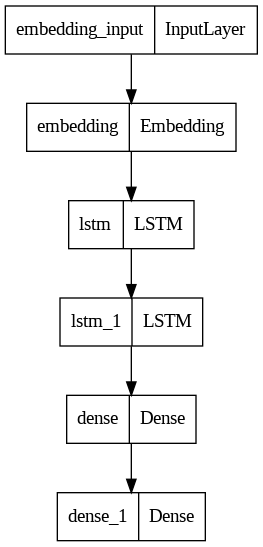

In [16]:
from tensorflow import keras
from keras.utils.vis_utils import plot_model

keras.utils.plot_model(model, to_file='plot.png', show_layer_names=True)

In [18]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint("next_words.h5", monitor='loss', verbose=1, save_best_only=True)
model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001))
model.fit(X, y, epochs=20, batch_size=64, callbacks=[checkpoint])

Epoch 1/20
345/345 [==============================] - ETA: 0s - loss: 6.2944
Epoch 1: loss improved from inf to 6.29436, saving model to next_words.h5
345/345 [==============================] - 15s 32ms/step - loss: 6.2944
Epoch 2/20
345/345 [==============================] - ETA: 0s - loss: 5.8915
Epoch 2: loss improved from 6.29436 to 5.89151, saving model to next_words.h5
345/345 [==============================] - 6s 18ms/step - loss: 5.8915
Epoch 3/20
345/345 [==============================] - ETA: 0s - loss: 5.6430
Epoch 3: loss improved from 5.89151 to 5.64296, saving model to next_words.h5
345/345 [==============================] - 5s 15ms/step - loss: 5.6430
Epoch 4/20
345/345 [==============================] - ETA: 0s - loss: 5.4139
Epoch 4: loss improved from 5.64296 to 5.41392, saving model to next_words.h5
345/345 [==============================] - 6s 16ms/step - loss: 5.4139
Epoch 5/20
345/345 [==============================] - ETA: 0s - loss: 5.1343
Epoch 5: loss improved

In [19]:
from tensorflow.keras.models import load_model
import numpy as np
import pickle

# Load the model and tokenizer
model = load_model('next_words.h5')
tokenizer = pickle.load(open('token.pkl', 'rb'))

def Predict_Next_Words(model, tokenizer, text):

  sequence = tokenizer.texts_to_sequences([text])
  sequence = np.array(sequence)
  preds = np.argmax(model.predict(sequence))
  predicted_word = ""
  
  for key, value in tokenizer.word_index.items():
      if value == preds:
          predicted_word = key
          break
  
  print(predicted_word)
  return predicted_word

In [ ]:
while(True):
  text = input("Enter your line: ")
  
  if text == "0":
      print("Execution completed.....")
      break
  
  else:
      try:
          text = text.split(" ")
          text = text[-3:]
          print(text)
        
          Predict_Next_Words(model, tokenizer, text)
          
      except Exception as e:
        print("Error occurred: ",e)
        continue


Enter your line: the window at the
['window', 'at', 'the']
1/1 [==============================] - 1s 657ms/step
dull
